***Import required libraries.***

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


***Import the datset and print it.***

In [5]:
import io

dataset = pd.read_csv(io.StringIO(uploaded['Mall_Customers.csv'].decode('utf-8')))
x = dataset.iloc[:, [3,4]].values

print(dataset.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


now we need to find the number of clusters.
In hierarchical clustering, we use scipy to extract the number of clusters.

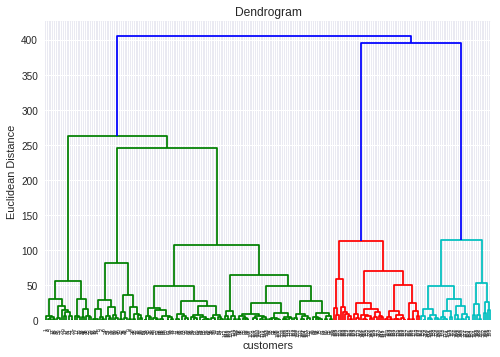

In [8]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidean Distance')
plt.show()

From above graph, find the longest vertical line until it doesn't cross any horizontal line and assume a horizontal line through. That are the ideal number of clusters. Here, it is "5".

***Now building the model.***

In [0]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
pred = hc.fit_predict(x)

***Visualising the clusters.***

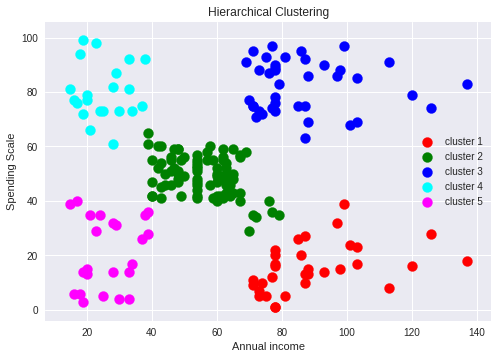

In [11]:
plt.scatter(x[pred == 0,0], x[pred == 0,1], s =100, c = 'red', label = 'cluster 1')
plt.scatter(x[pred == 1,0], x[pred == 1,1], s =100, c = 'green', label = 'cluster 2')
plt.scatter(x[pred == 2,0], x[pred == 2,1], s =100, c = 'blue', label = 'cluster 3')
plt.scatter(x[pred == 3,0], x[pred == 3,1], s =100, c = 'cyan', label = 'cluster 4')
plt.scatter(x[pred == 4,0], x[pred == 4,1], s =100, c = 'magenta', label = 'cluster 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual income')
plt.ylabel('Spending Scale')
plt.legend()
plt.show()